ANÁLISIS EXPLORATORIO DE LOS DATOS (EDA por sus siglas en inglés)

1. Conociendo los datos: Nombres de archivos, nombres y tipos de campos, cantidad de filas y columnas
2. Buscando valores nulos o campos vacíos
3. Identificamos data duplicada y la borramos - de existir -
4. Visualización de datos para encontrar correspondencia entre campos
5. Analizando Outliers (valores atípicos), graficamente.


PRE-PROCESAMIENTO
Convertir variables categóricas a datos numéricos (OneHotEncoder)


EDA 1. CONOCIENDO LOS DATOS

In [295]:
#EDA - 1. Conociendo los datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

df=pd.read_csv("E-Commerce_train.csv")
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,8999.00000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000
mean,4500.00000,4.015113,2.994999,208.561507,3.511501,15.097678,3584.364596,0.635515
std,2597.93187,1.138934,1.413143,48.289172,1.532074,17.400040,1614.750194,0.481312
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2250.50000,3.000000,2.000000,168.000000,3.000000,4.000000,1857.000000,0.000000
50%,4500.00000,4.000000,3.000000,211.000000,3.000000,8.000000,4046.000000,1.000000
75%,6749.50000,5.000000,4.000000,249.500000,4.000000,19.000000,4999.500000,1.000000
max,8999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [296]:
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,D,Ship,3,1,217,3,low,F,1,4177,1
8995,8996,F,Ship,5,3,232,3,medium,M,3,4526,0
8996,8997,A,Ship,4,5,260,3,medium,F,6,4221,0
8997,8998,B,Ship,4,2,184,3,medium,F,5,5931,1


In [297]:
#Renombramos los campos para identificarlos mejor y visualizar la data con "comodidad"
new_columns={'ID':'id', 'Warehouse_block':'Almacen', 'Mode_of_Shipment':'Transporte', 'Customer_care_calls':'Llamadas', 'Customer_rating':'Ptos_c', 'Cost_of_the_Product':'Costo', 'Prior_purchases':'Cpras_previas', 'Product_importance':'Importancia_p', 'Gender':'Sexo_c', 'Discount_offered':'Dcto_p', 'Weight_in_gms':'Peso_p', 'Reached.on.Time_Y.N':'A_tiempo'}
df.rename(columns=new_columns,inplace=True)

In [298]:
df

,id,Almacen,Transporte,Llamadas,Ptos_c,Costo,Cpras_previas,Importancia_p,Sexo_c,Dcto_p,Peso_p,A_tiempo
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,D,Ship,3,1,217,3,low,F,1,4177,1
8995,8996,F,Ship,5,3,232,3,medium,M,3,4526,0
8996,8997,A,Ship,4,5,260,3,medium,F,6,4221,0
8997,8998,B,Ship,4,2,184,3,medium,F,5,5931,1


2. VEREMOS EN QUÉ COLUMNAS HAY VALORES VACÍOS

In [299]:
df.columns
for x in df.columns:
    print("Columna: ", "[", x, "]", " Cantidad de filas vacías ", len(df[pd.isna(df[x])]))
    

Columna:  [ id ]  Cantidad de filas vacías  0
Columna:  [ Almacen ]  Cantidad de filas vacías  0
Columna:  [ Transporte ]  Cantidad de filas vacías  0
Columna:  [ Llamadas ]  Cantidad de filas vacías  0
Columna:  [ Ptos_c ]  Cantidad de filas vacías  0
Columna:  [ Costo ]  Cantidad de filas vacías  0
Columna:  [ Cpras_previas ]  Cantidad de filas vacías  0
Columna:  [ Importancia_p ]  Cantidad de filas vacías  0
Columna:  [ Sexo_c ]  Cantidad de filas vacías  0
Columna:  [ Dcto_p ]  Cantidad de filas vacías  0
Columna:  [ Peso_p ]  Cantidad de filas vacías  0
Columna:  [ A_tiempo ]  Cantidad de filas vacías  0


3. Identificaremos si hay Datos Duplicados para proceder a eliminarlos
También corraboraremos si la data inicial es igual a la cantidad

In [300]:
df_unica = df.drop_duplicates()
len(df) == len(df_unica)

True

Se verifica con la respuesta "True" que NO había data duplicada

4. Visualización de datos para encontrar correspondencia entre campos

Se usa la gráfica de CAJA Y BIGOTES comparando pares de variables (categórica y numérica) para la Clase: "A TIEMPO" (1) y "RETRASO" (0)
Esto se hace para corroborar el análisis numérico previo realizado con tablas dinámicas en Excel y visualmente con Power-BI
(en el video introductorio se explica acerca del "Análisis numérico previo")

IMPORTANTE:
Los datos, analizados en conjunto y por grupo (clase 0: "con retraso" y clase 1: "a tiempo"), muestran proporciones similares; en particular, se
puede decir, en términos relativos, que los datos en ambas categorías presentan la misma composición o estructura porcentual.

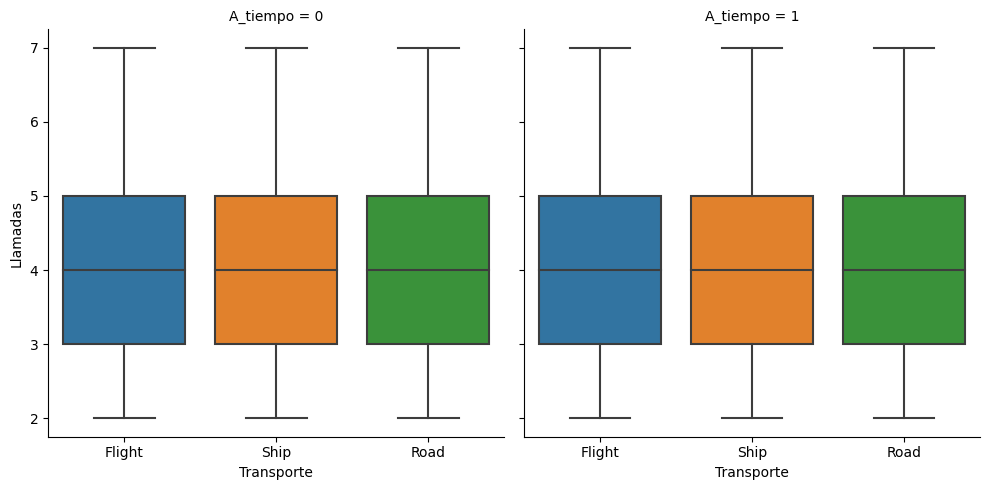

In [301]:
#Se corrobora que los datos de "llamadas previas al área de Atención al Cliente" y "Medio de Transporte" presentan la misma composición
#porcentual en cada categoría: "a tiempo - valor 1" y "retraso - valor 0"
sns.catplot(x="Transporte", y="Llamadas", data=df, kind="box", col="A_tiempo")
plt.show()

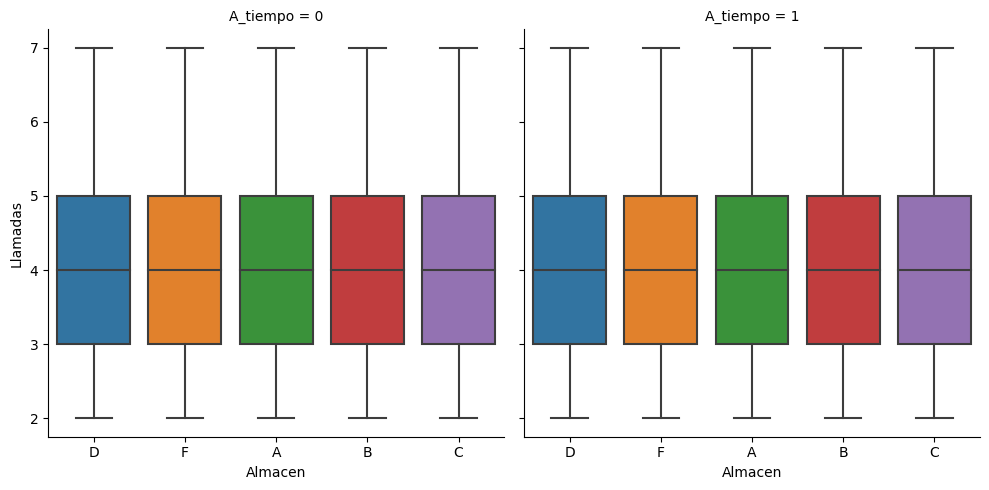

In [302]:
#Se corrobora que los datos de "llamadas previas al área de Atención al Cliente" y "Almacén de despacho" presentan la misma composición
#porcentual en cada categoría: "a tiempo - valor 1" y "retraso - valor 0"
sns.catplot(x="Almacen", y="Llamadas", data=df, kind="box", col="A_tiempo")
plt.show()

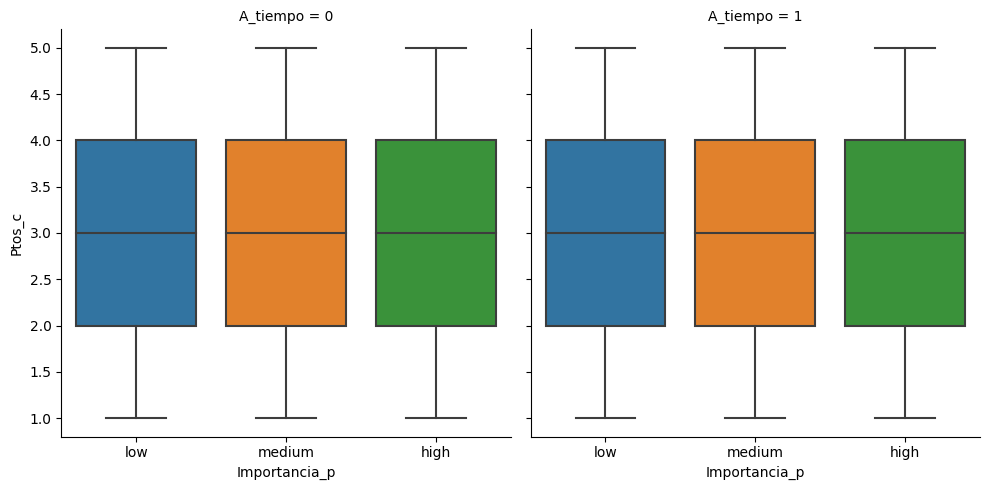

In [280]:
#Se corrobora que los datos de "Puntaje del Cliente" e "Importancia del Producto" presentan la misma composición
#porcentual en cada categoría: "a tiempo - valor 1" y "retraso - valor 0"
sns.catplot(x="Importancia_p", y="Ptos_c", data=df, kind="box", col="A_tiempo")
plt.show()

5. De las gráficas se observa que los datos NO presentan valores atípicos.

La información proporcionada no muestra alto grado de disparidad entre ambos grupos o clases: "a tiempo" y "retraso".
No obstante, si hay diferencia notoria entre la cantidad de casos con "retraso" y "a tiempo"

La clase "a tiempo" representa el 64% de los casos (8,999 ordenes de compra atendidas), frente al 36% de los casos con "retraso".

Es decir, la data presenta un DESBALANCE ! 

In [303]:
df

,id,Almacen,Transporte,Llamadas,Ptos_c,Costo,Cpras_previas,Importancia_p,Sexo_c,Dcto_p,Peso_p,A_tiempo
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,D,Ship,3,1,217,3,low,F,1,4177,1
8995,8996,F,Ship,5,3,232,3,medium,M,3,4526,0
8996,8997,A,Ship,4,5,260,3,medium,F,6,4221,0
8997,8998,B,Ship,4,2,184,3,medium,F,5,5931,1


PRE-PROCESAMIENTO DE DATOS
Codificando categorías  

In [304]:
df.head()

,id,Almacen,Transporte,Llamadas,Ptos_c,Costo,Cpras_previas,Importancia_p,Sexo_c,Dcto_p,Peso_p,A_tiempo
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [305]:
from sklearn.preprocessing import OneHotEncoder
codificador = OneHotEncoder()

reemplaza_alamcen={"A":1, "B":1, "C":1, "D":1, "F":2}
df["Almacen"].replace(reemplaza_alamcen, inplace=True)
#No será necesario lo siguiente:
#codificacion = codificador.fit_transform(df[["Almacen"]])
#new_almacen = pd.DataFrame(codificacion.toarray(), columns=codificador.categories_)
#df = pd.concat([df, new_almacen], axis="columns")
#df.drop(inplace=True, columns=["Almacen"])
df


,id,Almacen,Transporte,Llamadas,Ptos_c,Costo,Cpras_previas,Importancia_p,Sexo_c,Dcto_p,Peso_p,A_tiempo
0,1,1,Flight,4,2,177,3,low,F,44,1233,1
1,2,2,Flight,4,5,216,2,low,M,59,3088,1
2,3,1,Flight,2,2,183,4,low,M,48,3374,1
3,4,1,Flight,3,3,176,4,medium,M,10,1177,1
4,5,1,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,1,Ship,3,1,217,3,low,F,1,4177,1
8995,8996,2,Ship,5,3,232,3,medium,M,3,4526,0
8996,8997,1,Ship,4,5,260,3,medium,F,6,4221,0
8997,8998,1,Ship,4,2,184,3,medium,F,5,5931,1


Codificando "Transporte" (el medio de Transporte: Ship, Road, Flight)

In [306]:
reemplaza_transporte={"Flight":1, "Road":1, "Ship":3}
df["Transporte"].replace(reemplaza_transporte, inplace=True)
df

,id,Almacen,Transporte,Llamadas,Ptos_c,Costo,Cpras_previas,Importancia_p,Sexo_c,Dcto_p,Peso_p,A_tiempo
0,1,1,1,4,2,177,3,low,F,44,1233,1
1,2,2,1,4,5,216,2,low,M,59,3088,1
2,3,1,1,2,2,183,4,low,M,48,3374,1
3,4,1,1,3,3,176,4,medium,M,10,1177,1
4,5,1,1,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,1,3,3,1,217,3,low,F,1,4177,1
8995,8996,2,3,5,3,232,3,medium,M,3,4526,0
8996,8997,1,3,4,5,260,3,medium,F,6,4221,0
8997,8998,1,3,4,2,184,3,medium,F,5,5931,1


Codificando "Importancia_p" (Importancia del producto: low, medium, high)
Del análisis previo se identifica que el 47% de productos son "low", el 42% son "medium" y el 9% "high"

Se opta por no aplicar OneHotEncoder al creer que la matriz de correlación demostrará que no hay gran "influencia"
de esta variable a comparación de "Almacen" y Transporte".

In [307]:
reemplaza_importancia_p={"low":1, "medium":1, "high":0}
df["Importancia_p"].replace(reemplaza_importancia_p, inplace=True)
df

,id,Almacen,Transporte,Llamadas,Ptos_c,Costo,Cpras_previas,Importancia_p,Sexo_c,Dcto_p,Peso_p,A_tiempo
0,1,1,1,4,2,177,3,1,F,44,1233,1
1,2,2,1,4,5,216,2,1,M,59,3088,1
2,3,1,1,2,2,183,4,1,M,48,3374,1
3,4,1,1,3,3,176,4,1,M,10,1177,1
4,5,1,1,2,2,184,3,1,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,1,3,3,1,217,3,1,F,1,4177,1
8995,8996,2,3,5,3,232,3,1,M,3,4526,0
8996,8997,1,3,4,5,260,3,1,F,6,4221,0
8997,8998,1,3,4,2,184,3,1,F,5,5931,1


La columna "Sexo_c" que denota el género del cliente se considera un dato intrascendente, no solo por el análisis previo,
sino por aspectos legales, culturales y sociales.

Se procede a eliminar la columna "Sexo_c"

In [308]:
df.drop(inplace=True, columns=["Sexo_c"])

In [310]:
df.corr()

,id,Almacen,Transporte,Llamadas,Ptos_c,Costo,Cpras_previas,Importancia_p,Dcto_p,Peso_p,A_tiempo
id,1.000000,-0.000136,0.002674,0.214326,-0.000819,0.221421,0.133232,0.046121,-0.622558,0.361232,-0.457131
Almacen,-0.000136,1.000000,-0.000108,0.009041,-0.001002,-0.018405,-0.011540,0.010253,0.015379,0.003971,-0.000935
Transporte,0.002674,-0.000108,1.000000,-0.022077,0.003813,-0.000279,-0.001308,0.006321,0.009847,0.004648,0.005633
Llamadas,0.214326,0.009041,-0.022077,1.000000,0.012131,0.318109,0.164541,0.037231,-0.128805,-0.237731,-0.072261
Ptos_c,-0.000819,-0.001002,0.003813,0.012131,1.000000,0.009818,0.015606,0.003754,-0.004315,-0.000227,0.011045
Costo,0.221421,-0.018405,-0.000279,0.318109,0.009818,1.000000,0.100637,0.038867,-0.138259,-0.057113,-0.083470
Cpras_previas,0.133232,-0.011540,-0.001308,0.164541,0.015606,0.100637,1.000000,-0.032516,-0.072634,-0.113060,-0.048269
Importancia_p,0.046121,0.010253,0.006321,0.037231,0.003754,0.038867,-0.032516,1.000000,-0.014933,-0.063477,-0.019610
Dcto_p,-0.622558,0.015379,0.009847,-0.128805,-0.004315,-0.138259,-0.072634,-0.014933,1.000000,-0.417782,0.416357
Peso_p,0.361232,0.003971,0.004648,-0.237731,-0.000227,-0.057113,-0.113060,-0.063477,-0.417782,1.000000,-0.326877


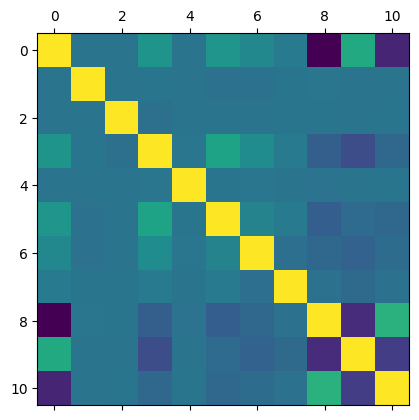

In [311]:
plt.matshow(df.corr())
plt.show()

ESCALANDO LOS DATOS

In [312]:
df

,id,Almacen,Transporte,Llamadas,Ptos_c,Costo,Cpras_previas,Importancia_p,Dcto_p,Peso_p,A_tiempo
0,1,1,1,4,2,177,3,1,44,1233,1
1,2,2,1,4,5,216,2,1,59,3088,1
2,3,1,1,2,2,183,4,1,48,3374,1
3,4,1,1,3,3,176,4,1,10,1177,1
4,5,1,1,2,2,184,3,1,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,1,3,3,1,217,3,1,1,4177,1
8995,8996,2,3,5,3,232,3,1,3,4526,0
8996,8997,1,3,4,5,260,3,1,6,4221,0
8997,8998,1,3,4,2,184,3,1,5,5931,1


In [337]:
df["A_tiempo"]

0       1
1       1
2       1
3       1
4       1
       ..
8994    1
8995    0
8996    0
8997    1
8998    0
Name: A_tiempo, Length: 8999, dtype: int64

EL MODELO !

Siendo un problema de decisión binaria (probabilística), se determina como Modeo de Predicción el de REGRESIÓN LOGÍSTICA.
Se considera ademas que la cantidad de variables(dimensiones) y la cantidad de observaciones, justifican la elección del modelo de predicción.

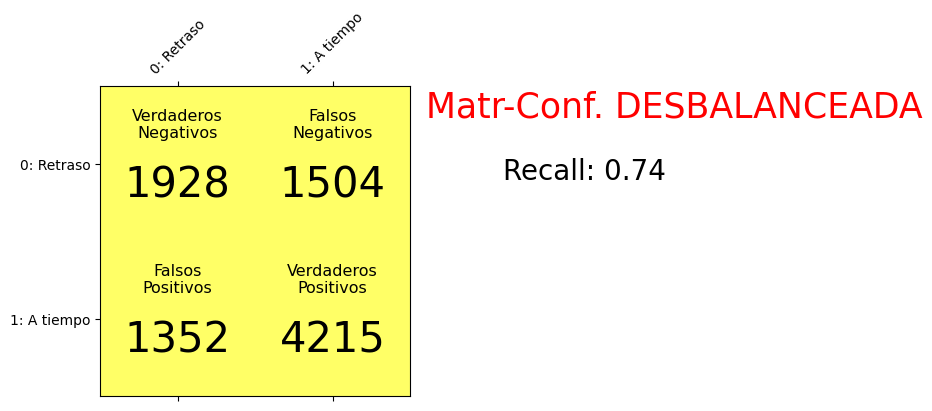

In [347]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

def matriz_de_confusion(clases_reales, clases_predichas, titulo):
    """Ver Matriz-Confusión"""

    matriz = confusion_matrix(clases_reales, clases_predichas)
    recall = recall_score(clases_reales, clases_predichas)

    #Matplotlib
    plt.figure(figsize=(4, 4))
    matriz = pd.DataFrame(matriz,
                    columns=["0: Retraso", "1: A tiempo"])
    plt.matshow(matriz, cmap="summer", vmin=0, vmax=20, fignum=1)
    plt.xticks(range(len(matriz.columns)), matriz.columns, rotation=45)
    plt.yticks(range(len(matriz.columns)), matriz.columns)
    etiquetas = (("Verdaderos\nNegativos", "Falsos\nPositivos"),
                ("Falsos\nNegativos", "Verdaderos\nPositivos"))
    
    plt.text(1.60, -0.30, titulo, fontsize=25, c = "red")
    plt.text(2.1, 0.10, "Recall: %0.2f" % recall, fontsize=20)

    for i in range(len(matriz.columns)):
        for j in range(len(matriz.columns)):
            plt.text(i, j + 0.14, str(matriz.iloc[i,j]),
                    fontsize=30, ha = "center", va ="center")
            plt.text(i, j - 0.25, etiquetas[i][j],
                    fontsize=11.5, ha = "center", va= "center")
    plt.show()

clase = df["A_tiempo"]
datos = df.drop(columns=["A_tiempo"])
modelo = LogisticRegression().fit(datos, clase)
matriz_de_confusion(clase, modelo.predict(datos), "Matr-Conf. DESBALANCEADA")

BALANCEO DEL MODELO, INCLUYENDO "PESOS" PARA EMPAREJAR EL DESBALANCE ENTRE LAS 2 CLASES: A_tiempo, Retraso

LA EXHAUSTIVIDAD (RECALL) DEL MODELO:
De la "DESCRIPCIÓN DEL PROBLEMA" y del tipo de negocio, se entiende que la Empresa puede tener problemas si "anuncia", "etiqueta" o "clasifica" 
un producto como "SE ENTREGARÁ A TIEMPO" y luego sucede lo contrario.

De manera que, dado ese objetivo y del análisis de los datos SE ASINA UN PESO DE "3" a la clase "A tiempo" (1) respecto de la clase "retraso" (0).

Esto se evidenciará con el parámetro "class_weight={1:3}" de la función LogisticRegression


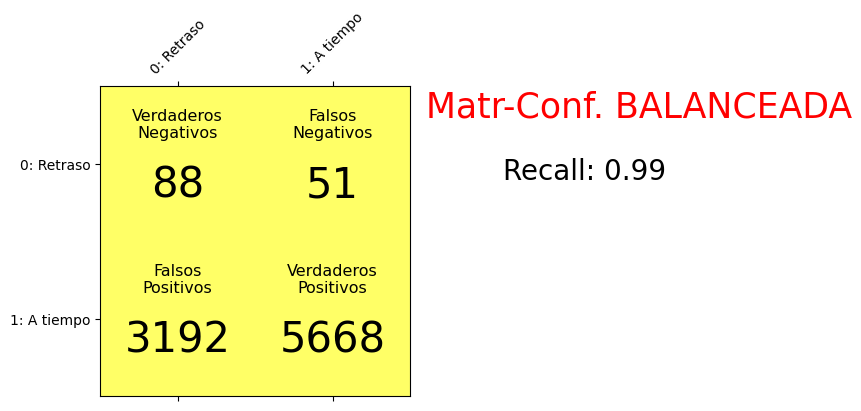

In [348]:
modelo = LogisticRegression(class_weight={1:3}).fit(datos, clase)
matriz_de_confusion(clase, modelo.predict(datos), "Matr-Conf. BALANCEADA")

CÁLCULO DEL RECALL

In [344]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import recall_score

y_pred = modelo.predict(datos)
print("Exhaustividad del Modelo: ", recall_score(clase, y_pred))

Exhaustividad del Modelo:  0.9910823570554292


In [345]:
y_pred = modelo.predict(datos)

# Evaluamos

print('El score del modelo es:', accuracy_score(clase, y_pred))

El score del modelo es: 0.6396266251805757


APLICAMOS LAS MISMAS TRANSFORMACIONES A LOS DATOS DE PRUEBA "E-Commerce_test.csv" (originalmente en formato xlsx)


In [317]:
data_test = pd.read_csv("E-Commerce_test.csv")

VERIFICAMOS SI HAY DATA DUPLICADA

In [326]:
df_unica = data_test.drop_duplicates()
len(data_test) == len(df_unica)

True

VERIFICAMOS CAMPOS VACÍOS

In [327]:
data_test.columns
for x in data_test.columns:
    print("Columna: ", "[", x, "]", " Cantidad de filas vacías ", len(data_test[pd.isna(data_test[x])]))

Columna:  [ id ]  Cantidad de filas vacías  0
Columna:  [ Almacen ]  Cantidad de filas vacías  0
Columna:  [ Transporte ]  Cantidad de filas vacías  0
Columna:  [ Llamadas ]  Cantidad de filas vacías  0
Columna:  [ Ptos_c ]  Cantidad de filas vacías  0
Columna:  [ Costo ]  Cantidad de filas vacías  0
Columna:  [ Cpras_previas ]  Cantidad de filas vacías  0
Columna:  [ Importancia_p ]  Cantidad de filas vacías  0
Columna:  [ Dcto_p ]  Cantidad de filas vacías  0
Columna:  [ Peso_p ]  Cantidad de filas vacías  0


In [318]:
data_test

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,9000,F,Ship,5,1,189,2,medium,M,10,5248
1,9001,D,Ship,5,3,150,2,high,F,9,4446
2,9002,F,Ship,3,3,200,3,low,M,3,5739
3,9003,A,Ship,5,1,133,2,medium,M,1,4643
4,9004,B,Ship,4,2,260,3,low,M,4,5504
...,...,...,...,...,...,...,...,...,...,...,...
1995,10995,A,Ship,4,1,252,5,medium,F,1,1538
1996,10996,B,Ship,4,1,232,5,medium,F,6,1247
1997,10997,C,Ship,5,4,242,5,low,F,4,1155
1998,10998,F,Ship,5,2,223,6,medium,M,2,1210


In [319]:
#Cambiamos nombres a las columnas
new_columns={'ID':'id', 'Warehouse_block':'Almacen', 'Mode_of_Shipment':'Transporte', 'Customer_care_calls':'Llamadas', 'Customer_rating':'Ptos_c', 'Cost_of_the_Product':'Costo', 'Prior_purchases':'Cpras_previas', 'Product_importance':'Importancia_p', 'Gender':'Sexo_c', 'Discount_offered':'Dcto_p', 'Weight_in_gms':'Peso_p', 'Reached.on.Time_Y.N':'A_tiempo'}
data_test.rename(columns=new_columns,inplace=True)

#Aplicamos categorización a campo "Almacen"
from sklearn.preprocessing import OneHotEncoder
reemplaza_alamcen={"A":1, "B":1, "C":1, "D":1, "F":2}
data_test["Almacen"].replace(reemplaza_alamcen, inplace=True)

#Aplicamos categorización a campo "Transporte"
reemplaza_transporte={"Flight":1, "Road":1, "Ship":3}
data_test["Transporte"].replace(reemplaza_transporte, inplace=True)

#Aplicamos categorización a campo "Importancia_p"
reemplaza_importancia_p={"low":1, "medium":1, "high":0}
data_test["Importancia_p"].replace(reemplaza_importancia_p, inplace=True)

#Descartamos campo "Sexo_c" por irrelevante
data_test.drop(inplace=True, columns=["Sexo_c"])



In [320]:
data_test

,id,Almacen,Transporte,Llamadas,Ptos_c,Costo,Cpras_previas,Importancia_p,Dcto_p,Peso_p
0,9000,2,3,5,1,189,2,1,10,5248
1,9001,1,3,5,3,150,2,0,9,4446
2,9002,2,3,3,3,200,3,1,3,5739
3,9003,1,3,5,1,133,2,1,1,4643
4,9004,1,3,4,2,260,3,1,4,5504
...,...,...,...,...,...,...,...,...,...,...
1995,10995,1,3,4,1,252,5,1,1,1538
1996,10996,1,3,4,1,232,5,1,6,1247
1997,10997,1,3,5,4,242,5,1,4,1155
1998,10998,2,3,5,2,223,6,1,2,1210


In [346]:
predicciones= modelo.predict(data_test)
print(predicciones)
predicciones = pd.DataFrame(predicciones, columns=['pred'])
print(predicciones)
predicciones.to_csv("duilius.csv",sep=',', index=False)
predicciones.value_counts()

[1 1 1 ... 1 1 1]
      pred
0        1
1        1
2        1
3        0
4        1
...    ...
1995     0
1996     1
1997     1
1998     1
1999     1

[2000 rows x 1 columns]


pred
1       1487
0        513
dtype: int64